## Convolutional Neural Network : Binary Image Classification 

To show the functionality of convnets we use the Dogs vs Cats Kaggle problem dataset @ https://www.kaggle.com/c/dogs-vs-cats/data

### Train, Validation & Test Data  Preparation

In [8]:
"""
Dataset Creation 
"""

data_dir = '/home/jay/ml/topics/neural nets and deep learning/data/dogs_cats_classification'
raw_dir_suffix = 'raw/all/train'
train_dir_suffix = 'train'
validation_dir_suffix = 'validation'
test_dir_suffix = 'test'

import os, shutil
import os.path as path
raw_data_dir = path.join(data_dir,raw_dir_suffix)
train_data_dir = path.join(data_dir,train_dir_suffix)
validation_data_dir = path.join(data_dir,validation_dir_suffix)
test_data_dir = path.join(data_dir,test_dir_suffix)

for artifact_dir in (train_data_dir,validation_data_dir,test_data_dir):
    shutil.rmtree(path=artifact_dir, ignore_errors=True)
    os.makedirs(artifact_dir)
    os.makedirs(path.join(artifact_dir,'cat'))
    os.makedirs(path.join(artifact_dir,'dog'))

for animal in ('cat','dog'):
    for i in range (1000):
        animal_file_name = f"{animal}.{i}.jpg"
        shutil.copy(path.join(raw_data_dir,animal_file_name),
                    path.join(train_data_dir,animal),
                    follow_symlinks=True)

    for i in range (1000,1500):
        animal_file_name = f"{animal}.{i}.jpg"
        shutil.copy(path.join(raw_data_dir,animal_file_name),
                    path.join(validation_data_dir,animal),
                    follow_symlinks=True)

    for i in range (1500,2000):
        animal_file_name = f"{animal}.{i}.jpg"
        shutil.copy(path.join(raw_data_dir,animal_file_name),
                    path.join(test_data_dir,animal),
                    follow_symlinks=True)


### Sanity check
for animal in ('cat','dog'):
    print(f'total training {animal} images:', len(os.listdir(path.join(train_data_dir,animal))))
    print(f'total validation {animal} images:', len(os.listdir(path.join(validation_data_dir,animal))))
    print(f'total test {animal} images:', len(os.listdir(path.join(test_data_dir, animal))))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


### Data Preprocessing

In [10]:
from keras.preprocessing import image

train_datagen = image.ImageDataGenerator(rescale=1./255)

validation_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Network

In [11]:
from keras import models
from keras import layers

dogs_cats_model = models.Sequential()
dogs_cats_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
dogs_cats_model.add(layers.MaxPooling2D((2, 2)))
dogs_cats_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
dogs_cats_model.add(layers.MaxPooling2D((2, 2)))
dogs_cats_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
dogs_cats_model.add(layers.MaxPooling2D((2, 2)))
dogs_cats_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
dogs_cats_model.add(layers.MaxPooling2D((2, 2)))
dogs_cats_model.add(layers.Flatten())
dogs_cats_model.add(layers.Dense(512, activation='relu'))
dogs_cats_model.add(layers.Dense(1, activation='sigmoid'))

dogs_cats_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

dogs_cats_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### Training & Evaluation

In [12]:
history = dogs_cats_model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=50)

dogs_cats_model.save('dogs_cats_model.h5')

Epoch 1/15
100/100 [==============================] - 36s 362ms/step - loss: 0.7778 - acc: 0.5200 - val_loss: 0.7625 - val_acc: 0.5000
Epoch 2/15
100/100 [==============================] - 34s 337ms/step - loss: 0.6957 - acc: 0.5660 - val_loss: 0.6445 - val_acc: 0.6170
Epoch 3/15
100/100 [==============================] - 36s 358ms/step - loss: 0.6469 - acc: 0.6425 - val_loss: 0.6495 - val_acc: 0.6370
Epoch 4/15
100/100 [==============================] - 34s 344ms/step - loss: 0.6005 - acc: 0.6850 - val_loss: 0.6218 - val_acc: 0.6480
Epoch 5/15
100/100 [==============================] - 33s 335ms/step - loss: 0.5660 - acc: 0.7180 - val_loss: 0.6176 - val_acc: 0.6830
Epoch 6/15
100/100 [==============================] - 40s 402ms/step - loss: 0.5367 - acc: 0.7340 - val_loss: 0.6720 - val_acc: 0.7050
Epoch 7/15
100/100 [==============================] - 60s 597ms/step - loss: 0.4820 - acc: 0.7560 - val_loss: 0.6148 - val_acc: 0.7020
Epoch 8/15
100/100 [==============================] - 5

{'val_loss': [0.7625086164474487, 0.6445223730802536, 0.6494786179065705, 0.6218489104509354, 0.6176143306493759, 0.6719687837362289, 0.6148334807157516, 0.5926605069637298, 0.6998216077685356, 0.6634021809697151, 0.6881699937582016, 0.899953824877739, 1.1308806604146957, 1.2286440712213516, 1.6737635123729706], 'val_acc': [0.5000000017881393, 0.617000002861023, 0.6369999998807907, 0.6479999995231629, 0.6829999977350235, 0.7049999988079071, 0.7020000016689301, 0.70799999833107, 0.7090000021457672, 0.7139999973773956, 0.7329999995231629, 0.7139999961853027, 0.7219999986886978, 0.716000006198883, 0.7040000009536743], 'loss': [0.77779591858387, 0.6956628715991974, 0.6469001087546349, 0.6004784065485, 0.5659945777058601, 0.5367180591821671, 0.48204097971320153, 0.44895784348249435, 0.38899890646338464, 0.32954890735447406, 0.2617918970249593, 0.19545536618679762, 0.16404785895720125, 0.138933995035477, 0.10994479552377015], 'acc': [0.5199999997019767, 0.5659999990463257, 0.6425000041723251

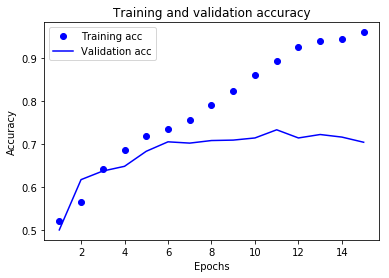

In [14]:
print(history.history)
import matplotlib.pyplot as plt

print(f"Type of history object >> {type(history)}")
print(f"History Keys >> {history.history.keys()}")

print(f"Validation Accuracy  >> {history.history['val_acc']}")
print((history.history['val_acc']))

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

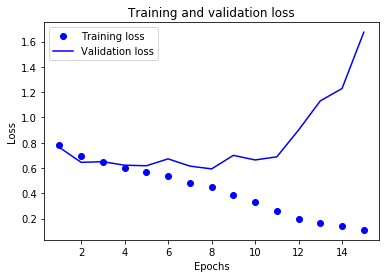

In [15]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()